In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


## From the above data I think it is price prediction of the diamond
#### I take price coloumn as target
#### It is Regression type problem

In [8]:
def distplot(x):
    #plt.figure(figsize=(10,10))
    ax = sns.distplot(df[x])
    plt.show()

In [9]:
def boxplot(x):
    #plt.figure(figsize=(10,10))
    ax = sns.boxplot(df[x])
    plt.show()

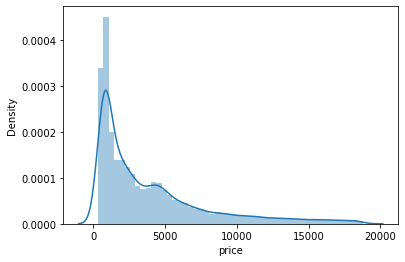

In [10]:
distplot('price')

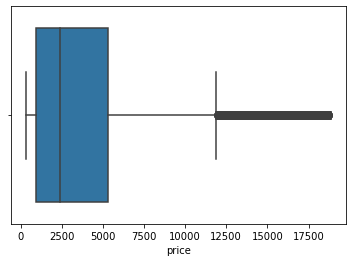

In [11]:
boxplot('price')

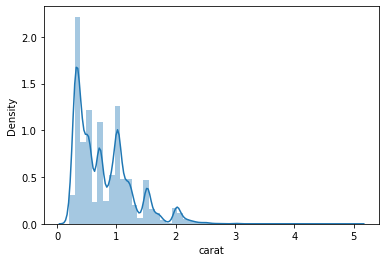

In [12]:
distplot('carat')

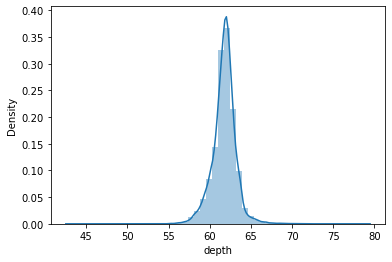

In [13]:
distplot('depth')

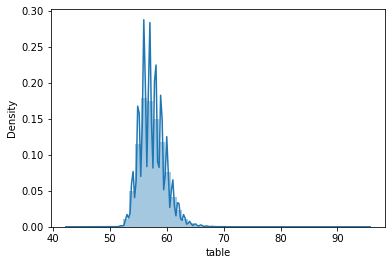

In [14]:
distplot('table')

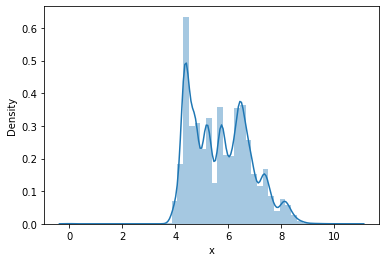

In [15]:
distplot('x')

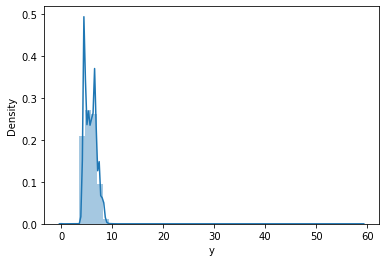

In [16]:
distplot('y')

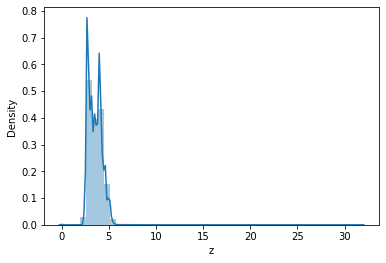

In [17]:
distplot('z')

In [18]:
def countplot(x):
    ax = sns.countplot(df[x])
    plt.show()

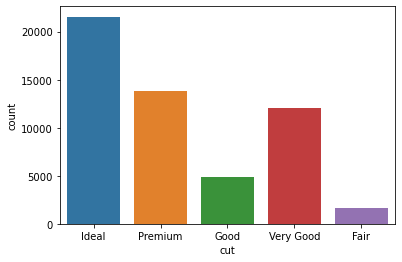

In [19]:
countplot('cut')

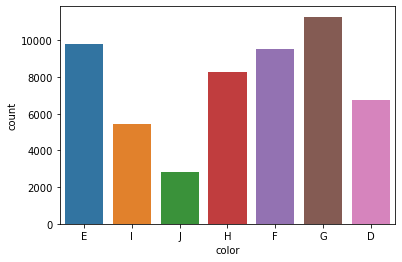

In [20]:
countplot('color')

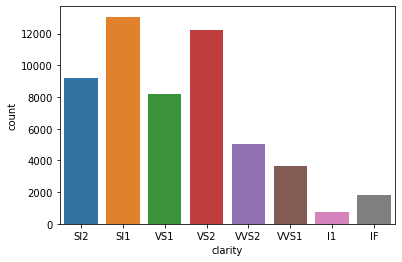

In [21]:
countplot('clarity')

## Bivariate analysis

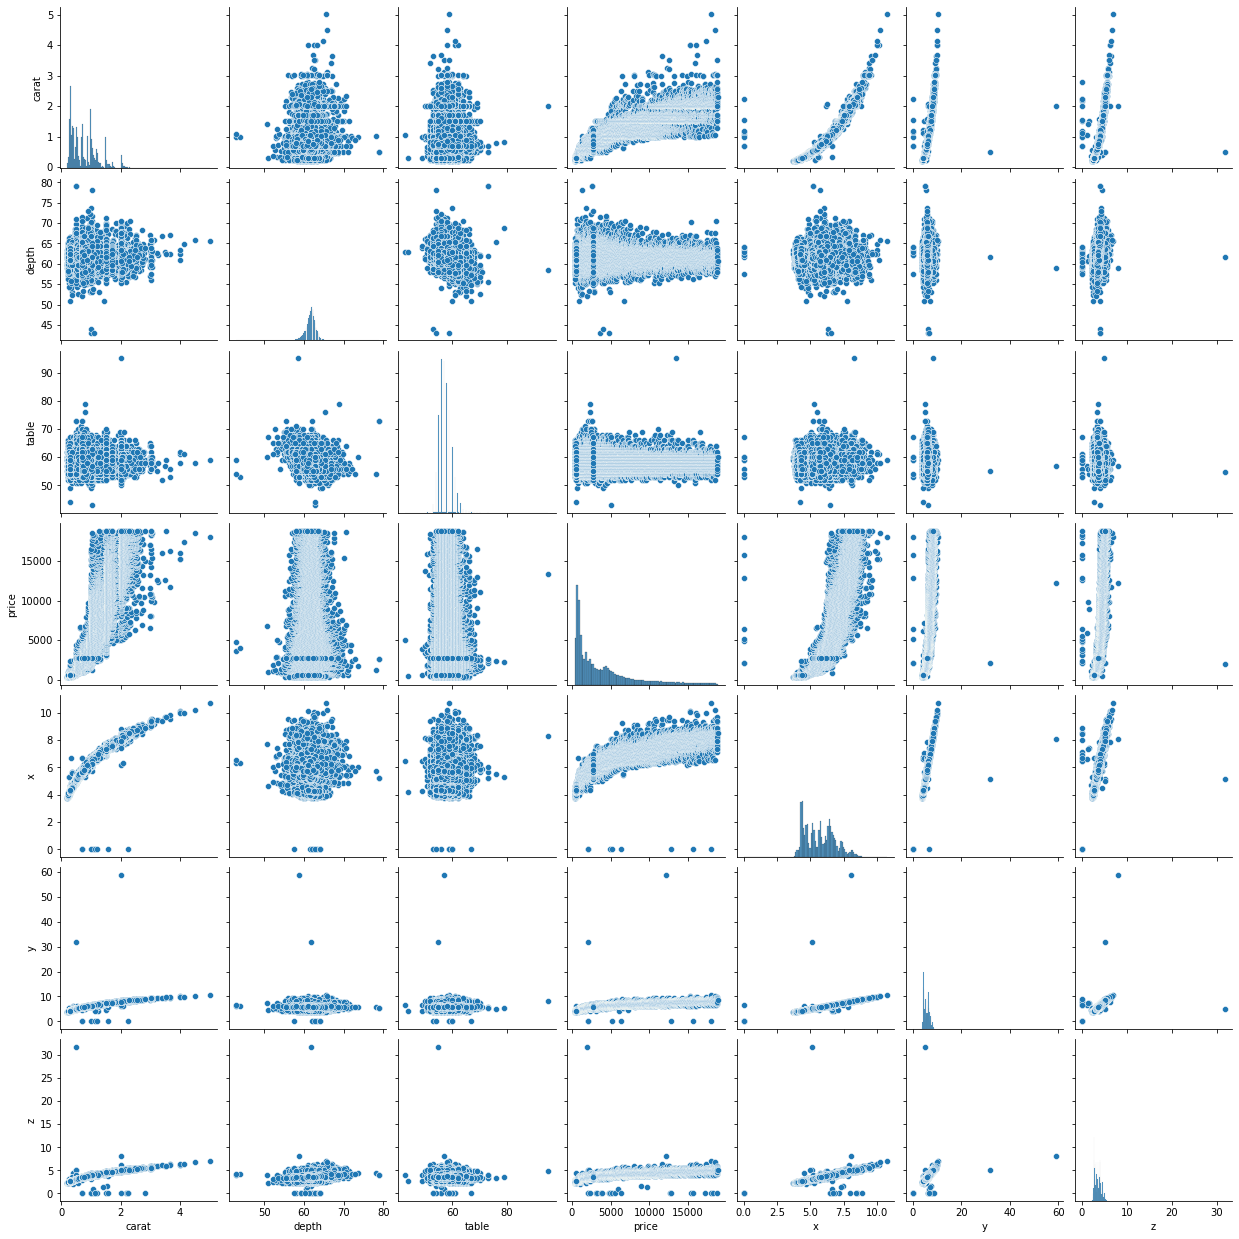

In [22]:
sns.pairplot(data = df)

In [23]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


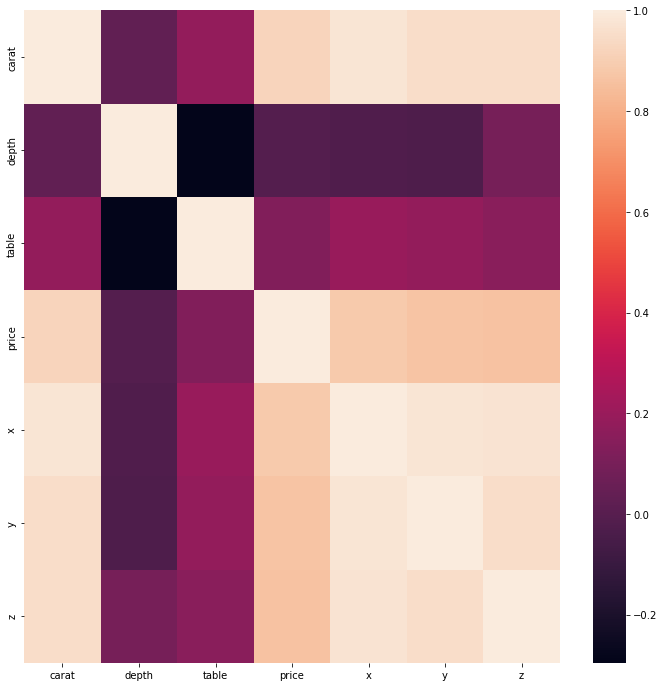

In [24]:
plt.figure(figsize = (12,12))
ax = sns.heatmap(df.corr())
plt.show()

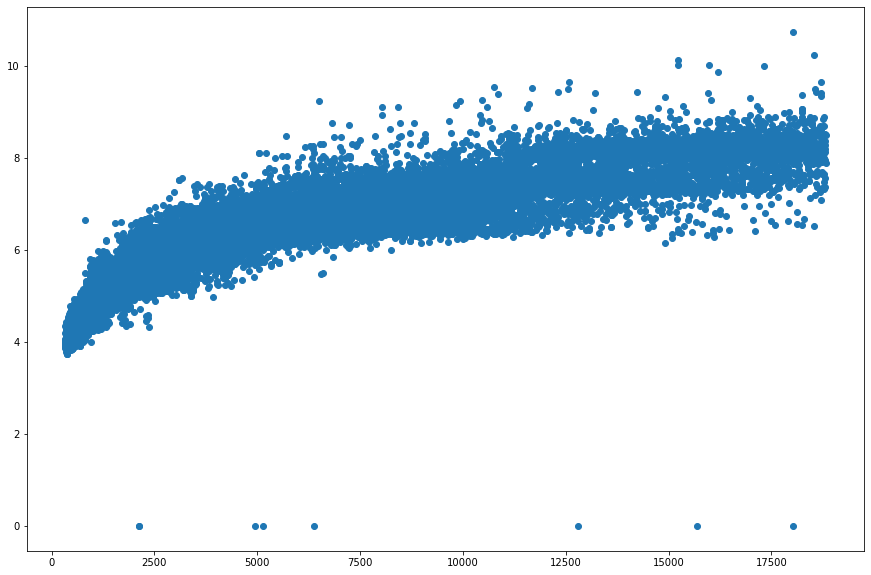

In [25]:
plt.figure(figsize = (15,10))
plt.scatter(x=df['price'],y=df['x'])

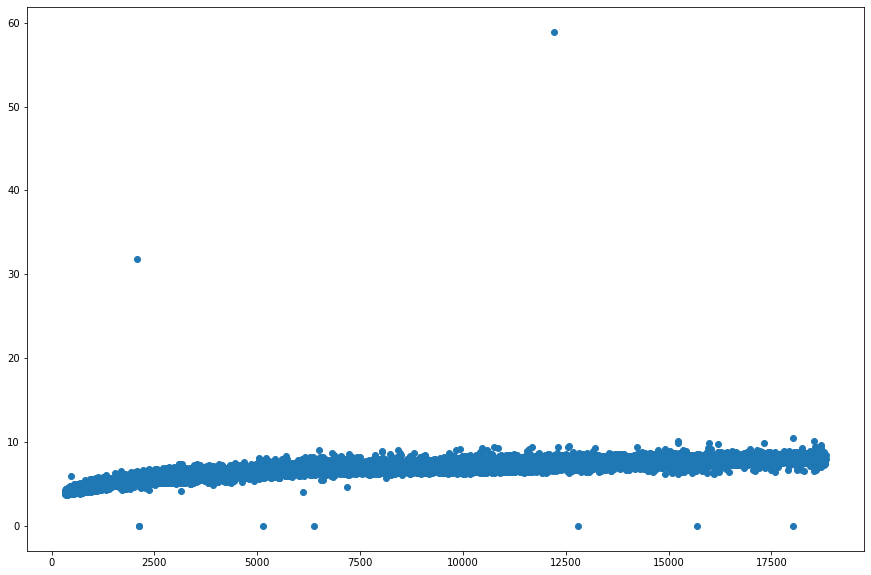

In [26]:
plt.figure(figsize = (15,10))
plt.scatter(x=df['price'],y=df['y'])

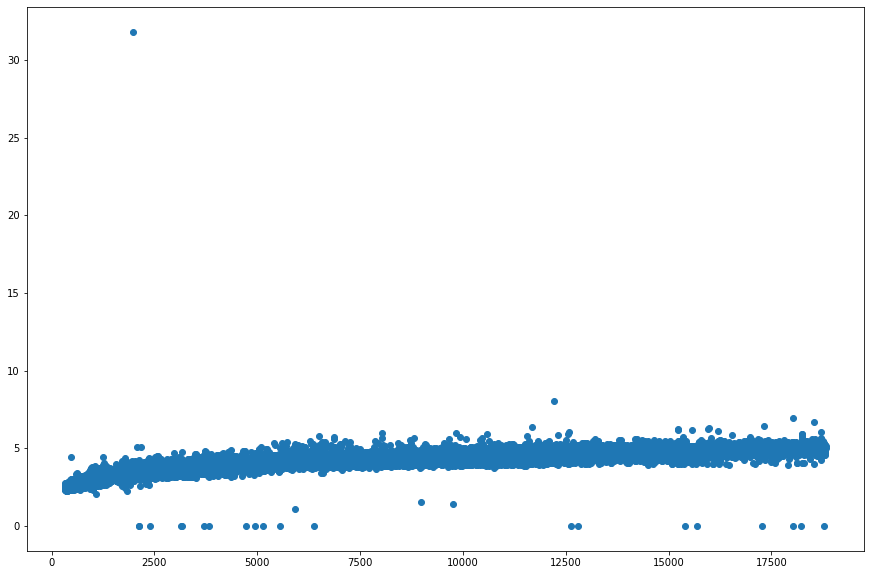

In [27]:
plt.figure(figsize = (15,10))
plt.scatter(x=df['price'],y=df['z'])

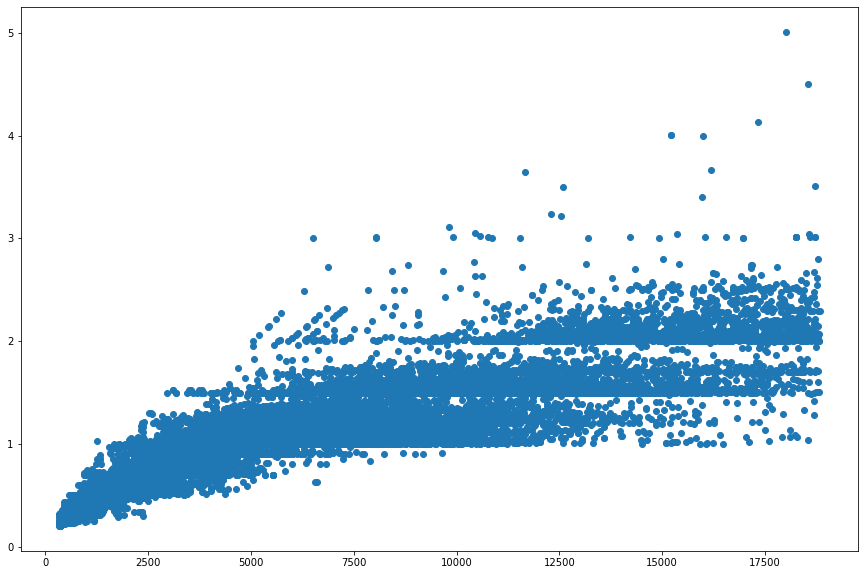

In [28]:
plt.figure(figsize = (15,10))
plt.scatter(x=df['price'],y=df['carat'])

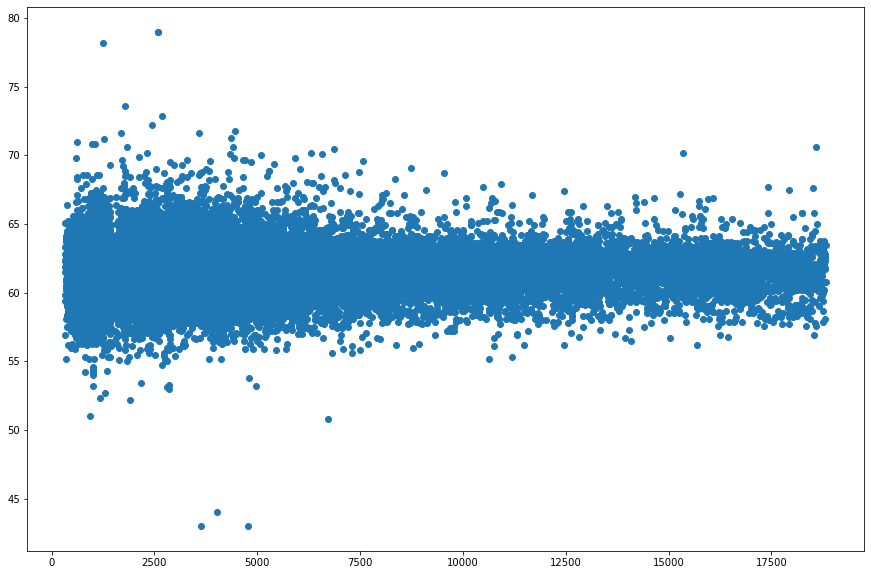

In [29]:
plt.figure(figsize = (15,10))
plt.scatter(x=df['price'],y=df['depth'])

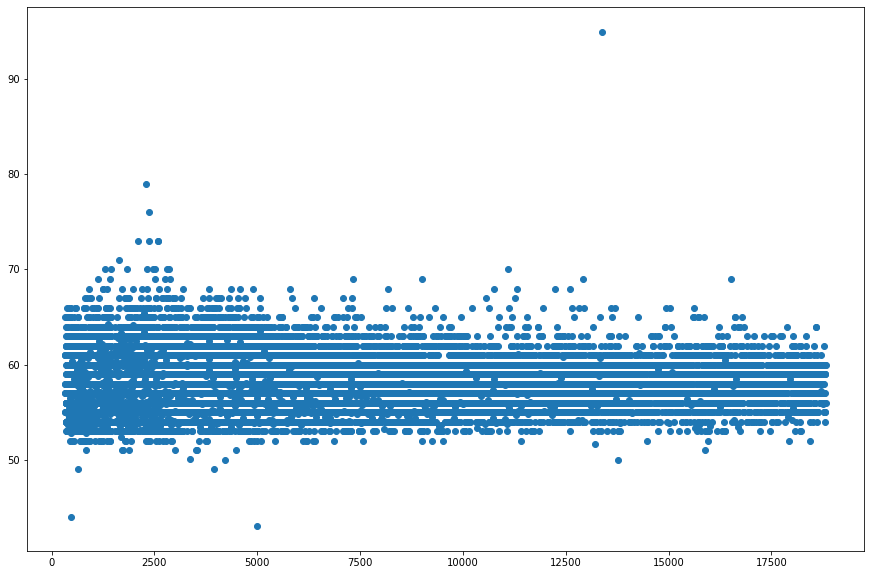

In [30]:
plt.figure(figsize = (15,10))
plt.scatter(x=df['price'],y=df['table'])

<AxesSubplot:xlabel='price', ylabel='cut'>

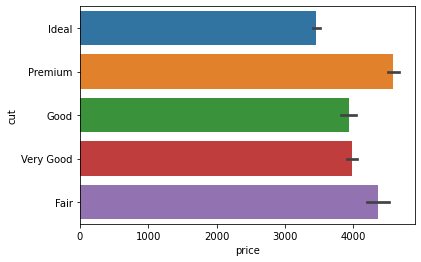

In [31]:
sns.barplot(x=df.price,y=df.cut)

<AxesSubplot:xlabel='price', ylabel='color'>

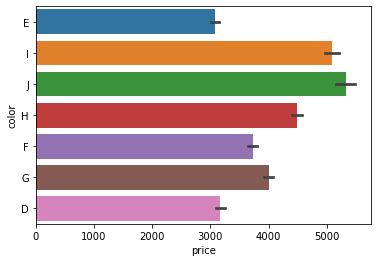

In [32]:
sns.barplot(x=df.price,y=df.color)

<AxesSubplot:xlabel='price', ylabel='clarity'>

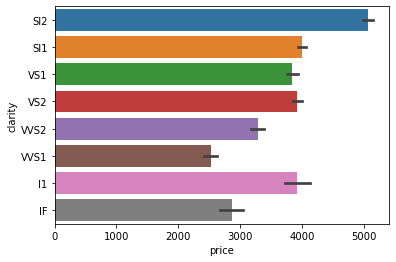

In [33]:
sns.barplot(x=df.price,y=df.clarity)

## Outliers Detection and Removing

In [34]:
def outliers(x):
    q1 = df[x].quantile(0.25)
    q2 = df[x].quantile(0.75)
    iqr = q2-q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q2 + 1.5*iqr
    return df[(df[x]>lower_limit) & (df[x]<upper_limit)]

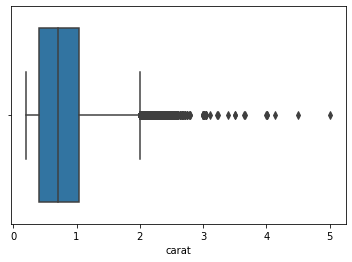

In [35]:
boxplot('carat')

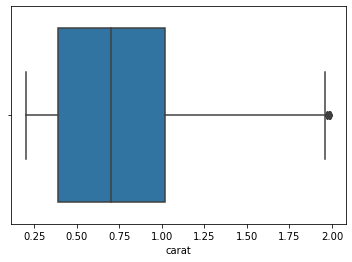

In [36]:
df = outliers('carat')
boxplot('carat')

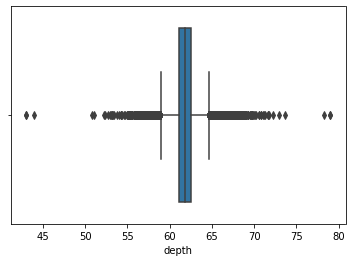

In [37]:
boxplot('depth')

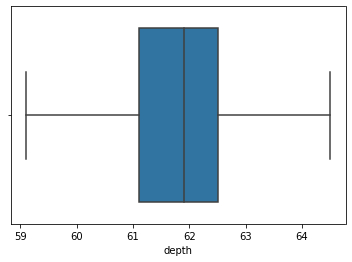

In [38]:
df = outliers('depth')
boxplot('depth')

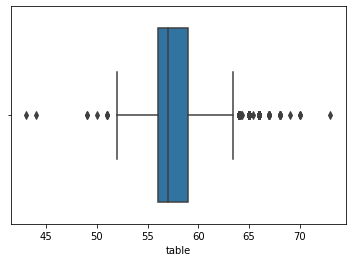

In [39]:
boxplot('table')

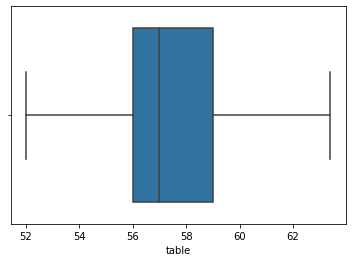

In [40]:
df = outliers('table')
boxplot('table')

In [41]:
df = outliers('x')
df = outliers('y')
df = outliers('z')



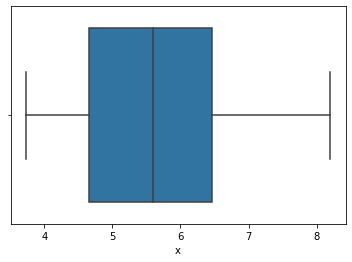

In [42]:
boxplot('x')

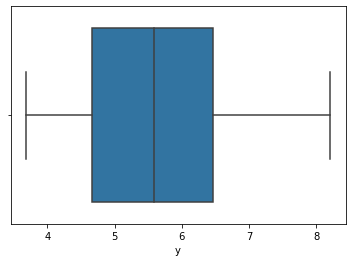

In [43]:
boxplot('y')

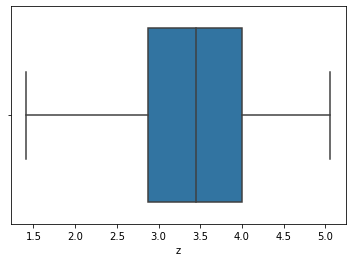

In [44]:
boxplot('z')

In [45]:
df.shape

(48436, 10)

## Converting Categorical coloumn to numerical

In [46]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [47]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [48]:
df['color'].value_counts()

G    10433
E     9047
F     8712
H     7270
D     6289
I     4491
J     2194
Name: color, dtype: int64

In [49]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [50]:
df.cut.value_counts()

Ideal        20984
Premium      12373
Very Good    11150
Good          3735
Fair           194
Name: cut, dtype: int64

In [51]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [52]:
df.clarity.value_counts()

SI1     11652
VS2     11327
VS1      7649
SI2      7233
VVS2     4851
VVS1     3543
IF       1728
I1        453
Name: clarity, dtype: int64

In [53]:
df = pd.get_dummies(df)

In [54]:
df.shape[0]

48436

In [55]:
df.reset_index(inplace=True)

In [56]:
df.head()

,index,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
3,4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,...,0,1,0,0,0,1,0,0,0,0
4,5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,...,0,1,0,0,0,0,0,0,0,1


In [57]:
df.drop('index',axis=1,inplace=True)

In [58]:
df.iloc[1:5,1]

1    59.8
2    62.4
3    63.3
4    62.8
Name: depth, dtype: float64

In [59]:
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

#### I would like to remove one of the dummie coloumn from data which have least frequency

In [60]:
df.drop(['color_J','cut_Fair','clarity_I1'],axis = 1,inplace = True)

In [61]:
df.shape

(48436, 24)

In [62]:
len(df)

48436

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48436 entries, 0 to 48435
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          48436 non-null  float64
 1   depth          48436 non-null  float64
 2   table          48436 non-null  float64
 3   price          48436 non-null  int64  
 4   x              48436 non-null  float64
 5   y              48436 non-null  float64
 6   z              48436 non-null  float64
 7   cut_Good       48436 non-null  uint8  
 8   cut_Ideal      48436 non-null  uint8  
 9   cut_Premium    48436 non-null  uint8  
 10  cut_Very Good  48436 non-null  uint8  
 11  color_D        48436 non-null  uint8  
 12  color_E        48436 non-null  uint8  
 13  color_F        48436 non-null  uint8  
 14  color_G        48436 non-null  uint8  
 15  color_H        48436 non-null  uint8  
 16  color_I        48436 non-null  uint8  
 17  clarity_IF     48436 non-null  uint8  
 18  clarit

In [64]:
Y = df.price

In [65]:
X = df.drop('price', axis=1)

In [66]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [91]:
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_G,color_H,color_I,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
from sklearn.preprocessing import Normalizer
n = Normalizer()
X_train = n.fit_transform(X_train)

In [104]:
X_train.shape

(36327, 23)

## Building KNN Regressor from Scratch

In [113]:
class KNearestRegressorr:
    def __init__(self, k, X_train, y_train):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train
        self.columns_of_train = X_train.shape[1]
    def predict(self, testing_data):
        predictions = []
        length = testing_data.shape[0]
        
        # Computing the distance of each testing data row with all other training data rows
        
        for i in range(length):
                distance = np.sqrt(np.sum((testing_data.iloc[i,:] - self.X_train) ** 2,axis = "columns"))
                distance = distance.values
                
                x = self.y_train.values
                a = np.column_stack((x,distance))
                a = a[a[:, 1].argsort()]   # sorting the array with distance column
                predictions.append(np.mean(a[0:self.k,0])) 
                        
        return predictions

  

In [114]:
regressor = KNearestRegressorr(5,X_train, y_train)

In [115]:
#X_test = n.fit_transform(X_test)

In [116]:
regressor.predict(X_test)

[1016.4,
 8800.8,
 705.0,
 3463.8,
 4887.2,
 2559.0,
 4224.2,
 6365.4,
 848.8,
 1683.4,
 1391.6,
 543.8,
 1851.6,
 958.6,
 5052.2,
 4061.4,
 4771.4,
 6785.8,
 6093.8,
 4618.6,
 1797.8,
 1457.0,
 5059.4,
 882.2,
 9098.4,
 2409.8,
 14085.0,
 5435.8,
 2392.4,
 4308.0,
 5976.6,
 3979.2,
 1638.0,
 561.6,
 4776.2,
 1143.0,
 851.0,
 1234.8,
 2978.6,
 1363.8,
 4993.0,
 912.8,
 1675.6,
 779.6,
 2215.4,
 7365.2,
 4470.0,
 877.6,
 741.4,
 775.6,
 748.0,
 510.2,
 1966.8,
 2508.6,
 841.2,
 1242.0,
 6516.0,
 5688.8,
 728.0,
 915.8,
 6471.6,
 4738.8,
 1938.4,
 1391.8,
 569.8,
 834.4,
 2974.6,
 7333.2,
 4356.2,
 4803.4,
 495.8,
 4606.6,
 12355.0,
 2938.6,
 5281.0,
 6574.6,
 6512.6,
 8232.4,
 4257.8,
 7257.4,
 8945.6,
 1883.4,
 9589.0,
 4382.6,
 3991.4,
 969.0,
 4511.4,
 707.2,
 1483.0,
 5206.8,
 1841.2,
 2894.6,
 1196.8,
 622.2,
 9741.6,
 3866.8,
 633.2,
 1111.2,
 1683.8,
 12489.4,
 1063.2,
 3588.0,
 5642.2,
 7450.8,
 1188.2,
 4944.0,
 8331.4,
 921.2,
 4061.4,
 1884.4,
 1688.4,
 745.6,
 2350.8,
 4282.

In [73]:
from sklearn.neighbors import KNeighborsRegressor

In [118]:
knn = KNeighborsRegressor()

In [119]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [120]:
knn.predict(X_test)

array([1016.4, 8800.8,  705. , ..., 4163.6, 9599. ,  862.6])

In [100]:
knn.score(X_test,y_test)

0.9389515145105785

In [78]:
from sklearn.metrics import r2_score

In [121]:
r2_score(regressor.predict(X_test),y_test)

0.9145571404953795

## Finally I got very close to actual accuracy with my KNN Scratch model
